In [1]:
import numpy as np
import cv2
import torch
from torch import nn
from torchvision import models
from torchvision.io import read_image

from utils.notebook import display_tensor, reload_module

In [13]:
class VGGLoss(nn.Module):
    def __init__(self, layers=8):
        super(VGGLoss, self).__init__()
        self.vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1).features
        self.vgg = self.vgg[:layers + 1]
        self.vgg.eval()
        self.vgg.requires_grad_(False)
    
    def forward(self, input, target):
        input_vgg = self.vgg(input)
        target_vgg = self.vgg(target)
        return nn.MSELoss()(input_vgg, target_vgg)

In [2]:
img = read_image("../images/test_256/Places365_test_00000001.jpg")

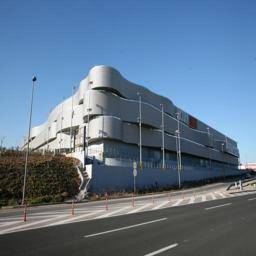

In [11]:
display_tensor(img, rescale=False)

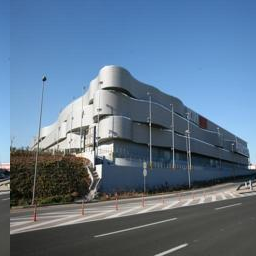

In [18]:
img2 = img.clone().roll(shifts=10, dims=2)
display_tensor(img2, rescale=False)

In [33]:
VGGLoss()(img.float()/255, img2.float()/255)

tensor(0.9690)